In [1]:
#Importing necessary libraries

import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # ML model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=columns, na_values="?")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert target variable: 0 = No Heart Disease, 1 = Heart Disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


In [3]:
# Define Features and Target
X = df.drop(columns=['target'])  # Features
y = df['target']                 # Target variable

# Convert categorical features to numeric
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

# Split the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



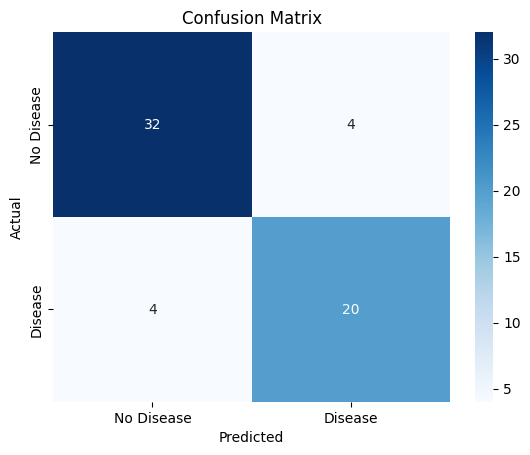

In [6]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
